In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
import re
import random
import scipy
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
import sklearn.model_selection as skl_ms
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
my_data = np.genfromtxt('../Data2/Test_Data.txt', delimiter=',',  dtype='int')
my_data.shape

(10000, 784)

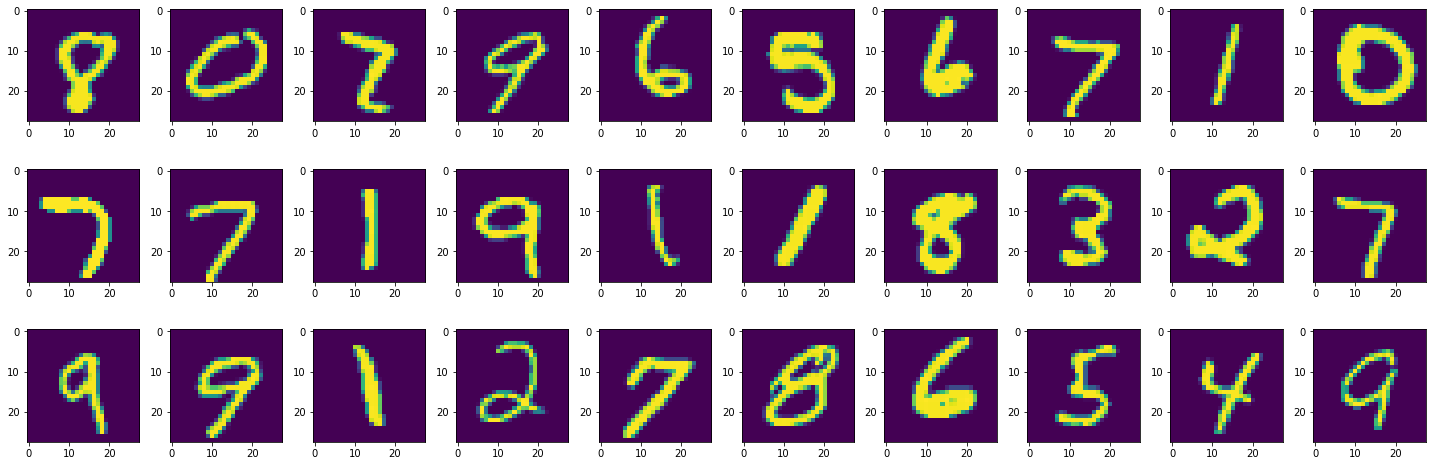

In [3]:
# plot the visual data into 30 different images
plt.figure(figsize=(20,20))
for i in range(0,30):
    plt.subplot(9,10,i + 1)
    # reshape from 1d np array to 2d pixel array
    grid = my_data[i].reshape(28,28)
    plt.imshow(grid)
plt.tight_layout()

In [4]:
#my_data.shape

Text(0.5, 1.0, 'cumulative sum Variable Variance')

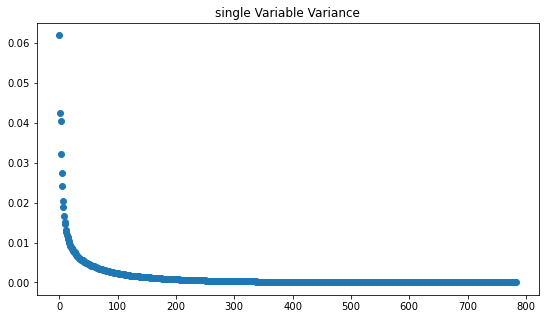

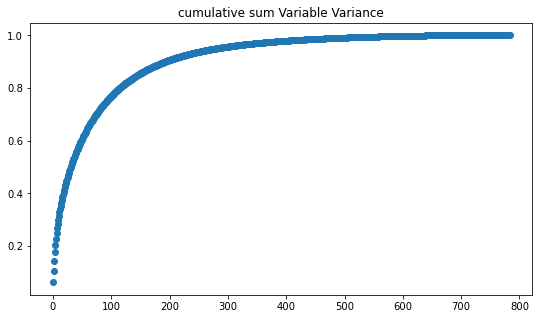

In [5]:
# here I will normalize my data and
# apply Linear dimensionality reduction using Singular Value Decomposition
# then with that run variance analasys on each indivisdual variable and the culalitive sum of squared errors
X = StandardScaler().fit_transform(my_data)
pca = PCA(n_components=784).fit(X)
plt.figure(figsize=(9,5))
plt.scatter(list(range(784)), pca.explained_variance_ratio_)
plt.title("single Variable Variance")
#############################################################
plt.figure(figsize=(9,5))
plt.scatter(list(range(784)), pca.explained_variance_ratio_.cumsum())
plt.title("cumulative sum Variable Variance")

In [6]:
def kmeans(data, targets, k=6, iters=8,plotdata=None):

    # good centroids found upon inspection and iterative tries 
    # [7641, 5051, 5572, 5908, 5520, 3758, 9406, 2209, 1548, 8090]   
    # [697, 7268, 36, 2046, 6839, 168, 8363, 6154, 2369, 8653]
    #centroid_indices = np.array([5385, 6835, 100, 3269, 9512, 7545, 3119, 586, 7236, 866]) 
    
    # chooses k randomly at different points from the dataset as intitial centroids
    centroid_indices = random.sample(range(data.shape[0]),k)
    print(centroid_indices)
    
    centroids =  np.array([data[i] for i in centroid_indices])
    
    for i in range(iters):
        centroids, classes = compute_centroids(data, centroids)
        plotme(plotdata,classes, centroids, iter=i+1)
        print(classes)
        
    plt.pause(4)
    plotme(plotdata, classes, iter="Final", clear = True)
    return classes

In [7]:
# measure eucledian distance between two points
def euclidian(x1,x2):
    return np.sqrt(sum(np.square(x1-x2)))

# get the min vals for distances relating to the centroids and the sparse datapoints   
def getclass(datapoint, centroids):
    distances = np.array([euclidian(datapoint, centroid) for centroid in centroids])
    return np.argmin(distances)

# compute the centroid iterably by using previous centroid and returning new one using mean measurement 
def compute_centroids(data, centroids):
    #begin with empty vector
    classes = np.zeros(data.shape[0])
    # assign each data point to the closest centroid
    for i in range(len(data)):
        classes[i] = getclass(data[i], centroids)

    new_centroids = np.ndarray(centroids.shape)
    # for each centroid update the classes using the mean
    for i in range(len(centroids)):
        new_centroids[i] = np.mean(data[classes==i],axis=0)

    return new_centroids, classes

# used to plot each iteration of the continuisly iterative k means clustering algorithm
def plotme(data, target, centroids=[], legends=False, iter=None,clear=False):
    # colors for each cluster
    colors=  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    if clear:
        plt.clf() # plot each iteration
        
    # generate a class value for each K and assign a value to its target 
    class_1 = data[target==0]
    class_2 = data[target==1]
    class_3 = data[target==2]
    class_4 = data[target==3]
    class_5 = data[target==4]
    class_6 = data[target==5]
    class_7 = data[target==6]
    class_8 = data[target==7]
    class_9 = data[target==8]
    class_10 = data[target==9]
    
    c1 = plt.scatter(class_1[:,0], class_1[:,1],c=colors[0],
            marker='o')	
    c2 = plt.scatter(class_2[:,0], class_2[:,1],c=colors[1],
            marker='o')
    c3 = plt.scatter(class_3[:,0], class_3[:,1],c=colors[2],
            marker='o')
    c4 = plt.scatter(class_4[:,0], class_4[:,1],c=colors[3],
            marker='o')	
    c5 = plt.scatter(class_5[:,0], class_5[:,1],c=colors[4],
            marker='o')
    c6 = plt.scatter(class_6[:,0], class_6[:,1],c=colors[5],
            marker='o')
    c7 = plt.scatter(class_7[:,0], class_7[:,1],c=colors[6],
            marker='o')	
    c8 = plt.scatter(class_8[:,0], class_8[:,1],c=colors[7],
            marker='o')
    c9 = plt.scatter(class_9[:,0], class_9[:,1],c=colors[8],
            marker='o')
    c10 = plt.scatter(class_10[:,0], class_10[:,1],c=colors[9],
            marker='o')
    
    if centroids!=[]:
        plt.scatter(centroids[:,0],centroids[:,1],c='k',marker='x',s= 150)

    plt.title('Visual Data Clustering with 10 clusters and unknown outcomes: Iteration #'+str(iter))

    plt.pause(1)


In [15]:
pca = PCA(n_components=.5).fit(my_data)
pca_2d = pca.transform(my_data)
pca_2d

array([[ 177.92247194, -646.31288731,   86.1314975 , ..., -453.56837805,
         531.21916537,  -34.71650389],
       [ 695.50876028, -233.36485498,  677.46424709, ...,  144.14693248,
        -588.79696001,  -62.74292278],
       [-765.17908682, -315.92982055, -119.33463697, ...,   89.2870609 ,
         293.35695581, -140.94372855],
       ...,
       [ -75.46304839, -697.06944068,  543.00948473, ...,  323.6169146 ,
         815.35398885,  -51.76086538],
       [-642.44045174,  -39.69627946,  112.75259032, ...,  344.03518466,
         530.68110918,  -31.83618564],
       [1163.71691122,  416.29707008,  -38.02674875, ..., -219.05950174,
         441.01525753,  -47.52127391]])

[615, 4471, 8448, 7639, 273, 8701, 2040, 6581, 6020, 2435]


C:\Users\willa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:65: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


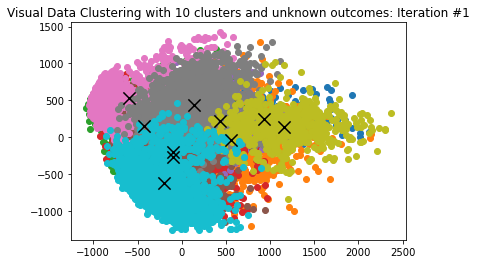

[9. 8. 2. ... 9. 9. 1.]


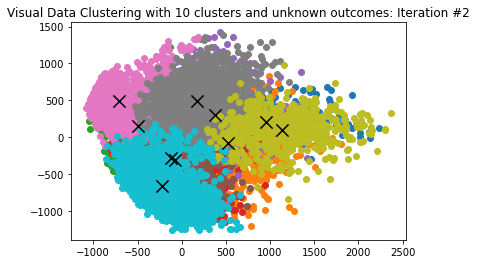

[5. 8. 2. ... 9. 9. 4.]


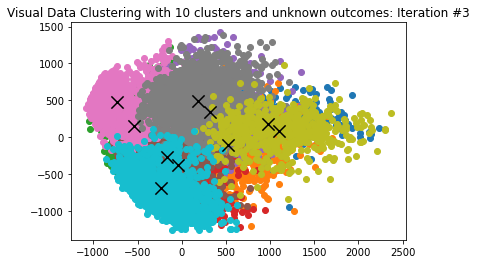

[5. 8. 2. ... 5. 5. 4.]


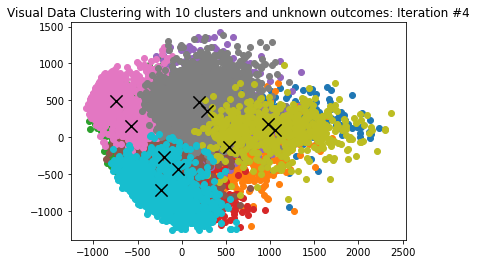

[5. 8. 9. ... 5. 5. 1.]


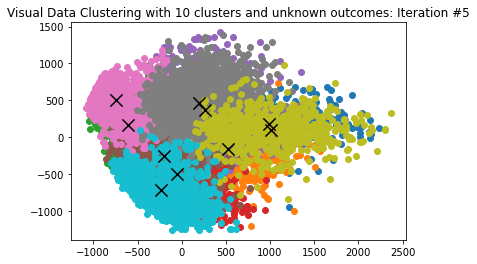

[5. 8. 9. ... 5. 5. 1.]


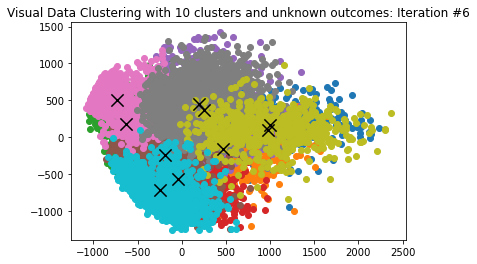

[5. 8. 9. ... 5. 5. 1.]


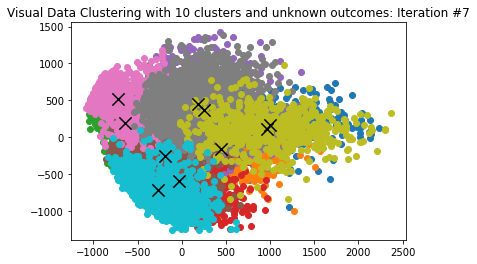

[5. 8. 9. ... 5. 5. 1.]


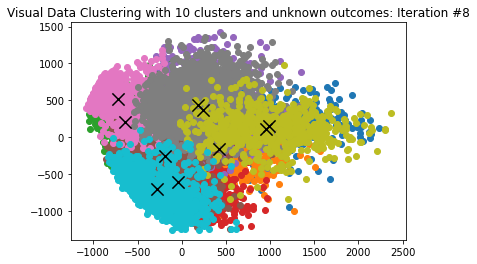

[5. 8. 9. ... 5. 5. 1.]


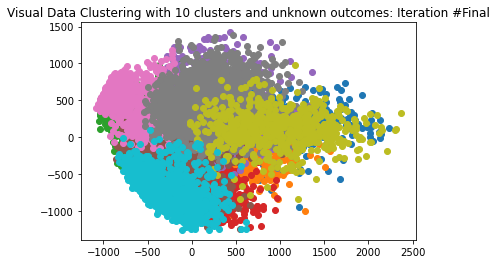

In [16]:
plt.ion() # Interactive on
target = np.array([0,1,2,3,4,5,6,7,8,9])
y = kmeans(pca_2d, target, k=len(np.unique(target)), plotdata=pca_2d)

In [18]:
#Takes some time as using TSNE scales quadratically with the amount of data used
TSNE_2d = TSNE(n_components=2).fit_transform(pca_2d)
TSNE_2d

array([[-12.298948 , -10.859289 ],
       [ 64.585724 ,  45.115135 ],
       [-13.157508 , -55.965878 ],
       ...,
       [-25.181608 , -65.74443  ],
       [ -9.156187 , -34.2178   ],
       [ -1.3667266,  33.726547 ]], dtype=float32)

[2978, 7372, 9821, 9371, 91, 6461, 5269, 2175, 7926, 8738]


C:\Users\willa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:65: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


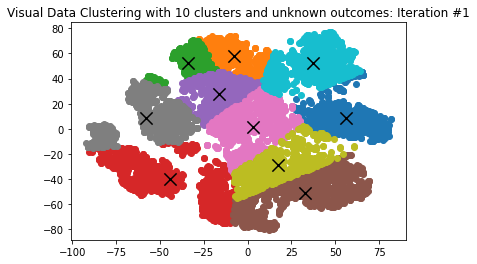

[6. 0. 3. ... 3. 3. 4.]


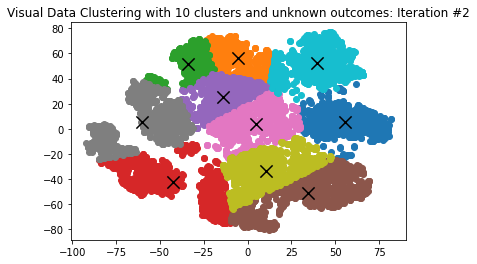

[6. 9. 3. ... 3. 8. 4.]


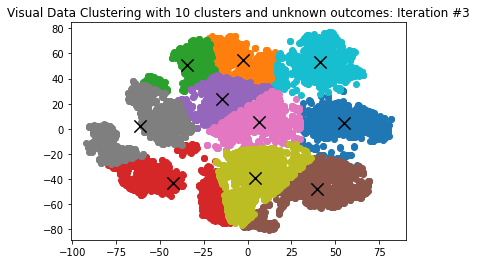

[6. 9. 8. ... 3. 8. 4.]


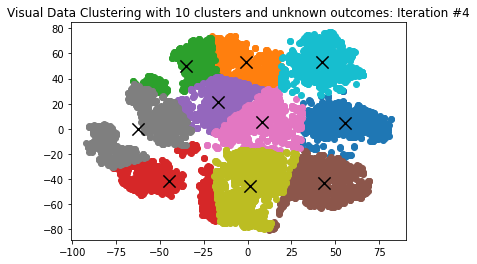

[6. 9. 8. ... 3. 8. 4.]


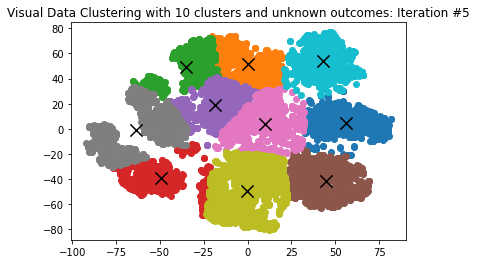

[6. 9. 8. ... 3. 8. 4.]


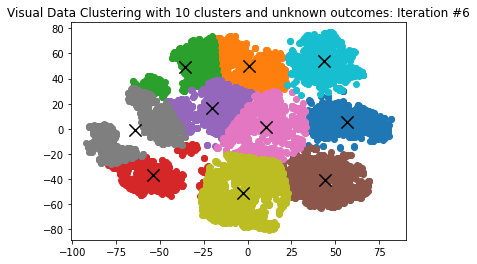

[6. 9. 8. ... 8. 8. 1.]


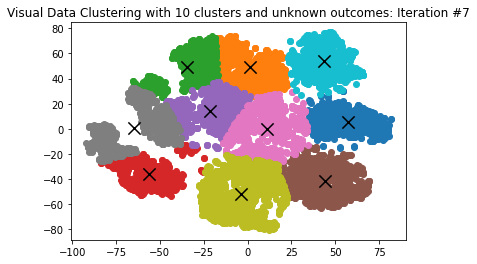

[6. 9. 8. ... 8. 8. 1.]


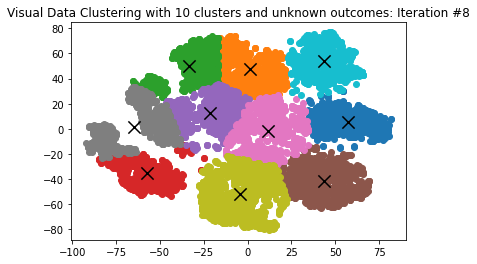

[6. 9. 8. ... 8. 8. 1.]


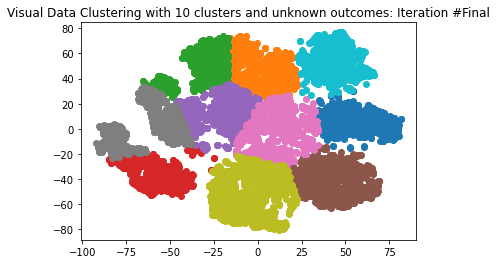

In [19]:
plt.ion() # Interactive on
target = np.array([0,1,2,3,4,5,6,7,8,9])
y = kmeans(TSNE_2d, target, k=len(np.unique(target)), plotdata=TSNE_2d)

In [12]:
#type(y)
y = y.astype(np.int)
y[:100]

array([3, 4, 3, 3, 5, 2, 5, 3, 6, 4, 8, 3, 6, 8, 6, 9, 0, 0, 7, 3, 1, 3,
       6, 7, 3, 4, 5, 2, 1, 8, 7, 6, 4, 2, 7, 7, 3, 1, 0, 1, 3, 0, 1, 6,
       8, 2, 5, 2, 1, 0, 7, 6, 9, 3, 2, 0, 8, 3, 1, 1, 0, 7, 6, 0, 7, 9,
       3, 0, 6, 7, 2, 9, 0, 4, 7, 6, 7, 5, 9, 4, 5, 4, 2, 7, 7, 5, 3, 8,
       6, 2, 1, 0, 2, 4, 8, 1, 7, 6, 4, 5])

In [13]:
for i in range(len(y)):
        y[i]=y[i]+1
y[:100]

array([ 4,  5,  4,  4,  6,  3,  6,  4,  7,  5,  9,  4,  7,  9,  7, 10,  1,
        1,  8,  4,  2,  4,  7,  8,  4,  5,  6,  3,  2,  9,  8,  7,  5,  3,
        8,  8,  4,  2,  1,  2,  4,  1,  2,  7,  9,  3,  6,  3,  2,  1,  8,
        7, 10,  4,  3,  1,  9,  4,  2,  2,  1,  8,  7,  1,  8, 10,  4,  1,
        7,  8,  3, 10,  1,  5,  8,  7,  8,  6, 10,  5,  6,  5,  3,  8,  8,
        6,  4,  9,  7,  3,  2,  1,  3,  5,  9,  2,  8,  7,  5,  6])

In [14]:
np.savetxt(r'../Data2/out16.txt',y,fmt='%d')